In [1]:
import sys
from pathlib import Path
import os
import pandas as pd
from PIL import Image
# Add parent directory to sys.path
parent_dir = Path("..").resolve()
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

# Now import your module
import importlib
import common_utils
importlib.reload(common_utils)

# Import specific functions
from common_utils import (
    get_unique_image_shapes,
    get_unique_image_paths,
    build_image_dataframe,
    split_data,
    bin_ages,
    bin_ages_7,
    augment_images
)


2025-04-09 12:40:51.081283: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 12:40:51.091711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744202451.103867     731 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744202451.107563     731 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744202451.117909     731 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Check the shapes to see what we are working with and know how to handle the imput into the model later on

In [ ]:
# unique_shapes = get_unique_image_shapes()
# for shape in unique_shapes:
#     print(shape)


In [3]:
paths=get_unique_image_paths()
len(paths)

9572

In [4]:
aug_paths=augment_images(paths)
len(paths)

9572

In [6]:
image_paths_csv=build_image_dataframe(paths)
image_paths_csv_aug=build_image_dataframe(aug_paths)

In [5]:
len(aug_paths)

86148

In [6]:
image_paths_csv.head(5)

,path,age
0,../raw_data2/face_age/001/1000.png,1
1,../raw_data2/face_age/001/1018.png,1
2,../raw_data2/face_age/001/1030.png,1
3,../raw_data2/face_age/001/1062.png,1
4,../raw_data2/face_age/001/1068.png,1


In [ ]:
image_paths_csv = pd.read_csv("./")

<Axes: xlabel='age'>

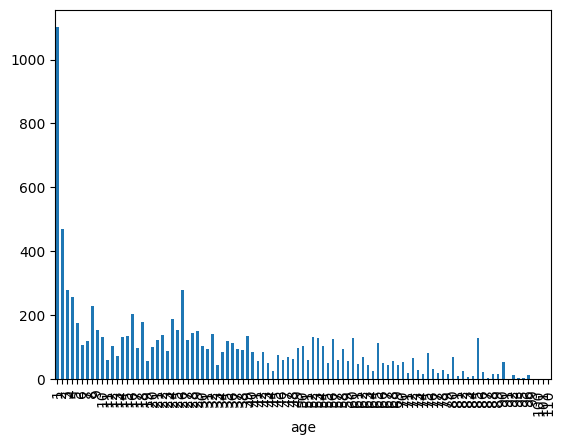

In [33]:
image_paths_csv.age.value_counts().sort_index().plot(kind='bar')

In [7]:
image_paths_csv=bin_ages(image_paths_csv)
image_paths_csv_7_classes=bin_ages_7(image_paths_csv)
image_paths_csv_aug=bin_ages(image_paths_csv_aug)
image_paths_csv_7_classes_aug=bin_ages_7(image_paths_csv_aug)

<Axes: xlabel='age_bin_label'>

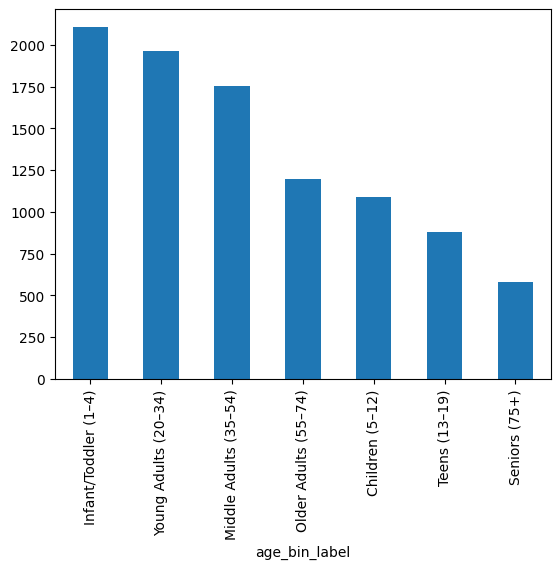

In [37]:
image_paths_csv_7_classes.age_bin_label.value_counts().plot(kind='bar')

In [10]:
image_paths_csv.head()

,path,age,age_bin,age_bin_label
0,../raw_data2/face_age/001/1000.png,1,0,Infant/Toddler (1–4)
1,../raw_data2/face_age/001/1018.png,1,0,Infant/Toddler (1–4)
2,../raw_data2/face_age/001/1030.png,1,0,Infant/Toddler (1–4)
3,../raw_data2/face_age/001/1062.png,1,0,Infant/Toddler (1–4)
4,../raw_data2/face_age/001/1068.png,1,0,Infant/Toddler (1–4)


In [8]:
import os
os.makedirs("./processed_data",exist_ok=True)

image_paths_csv.to_csv("./processed_data/image_paths.csv", index=False)
image_paths_csv_7_classes.to_csv("./processed_data/image_paths_7_classes.csv", index=False)

image_paths_csv_aug.to_csv("./processed_data/image_paths_aug.csv", index=False)
image_paths_csv_7_classes_aug.to_csv("./processed_data/image_paths_7_classes_aug.csv", index=False)

In [12]:
image_paths_csv.age_bin.value_counts().sort_index()

age_bin
0    2109
1    1087
2     879
3    1962
4    1755
5    1199
6     581
Name: count, dtype: int64

In [13]:
paths_train_df, paths_val_df, paths_test_df = split_data(image_paths_csv)